In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import json

In [2]:
sc_out = pd.DataFrame()
for file in os.listdir('../ce_data/StatCache'):
    x = pd.read_csv("../ce_data/StatCache/"+file)
    x['id'] = x.index
    x['id'] = x['id'].apply(lambda x: file[:-4] + "_" + str(x))
    sc_out = pd.concat([x, sc_out], ignore_index=True)
sc_out = sc_out.sort_values("id", ascending=True, ignore_index=True).fillna(0)
print(sc_out)
for i in ['32','64','128','256','512','1024','2048','4096','8192']:
    sc_out['lru_'+i] = sc_out['lru_'+i]/sc_out['total_accesses']
print(sc_out)

        random_32  lru_32  random_64  lru_64  random_128  lru_128  random_256  \
0        0.000000      16   0.000000       0    0.000000        0    0.000000   
1        0.000000      32   0.000000       0    0.000000        0    0.000000   
2        0.000000       0   0.000000       0    0.000000        0    0.000000   
3        0.000619     240   0.000497     240    0.000436      240    0.000436   
4        0.001229     416   0.000985     416    0.000924      416    0.000863   
...           ...     ...        ...     ...         ...      ...         ...   
141556   0.000000       0   0.000000       0    0.000000        0    0.000000   
141557   0.000000       0   0.000000       0    0.000000        0    0.000000   
141558   0.000000       0   0.000000       0    0.000000        0    0.000000   
141559   0.000000       0   0.000000       0    0.000000        0    0.000000   
141560   0.000000       0   0.000000       0    0.000000        0    0.000000   

        lru_256  random_512

In [3]:
cache_misses = pd.read_csv("../ce_data/caches/llc_miss_ratio.csv")
cache_misses = cache_misses.sort_values("id", ignore_index=True)
print(cache_misses)

                           id        32        64       128       256  \
0         400.perlbench-41B_0  1.000000  1.000000  1.000000  0.998652   
1         400.perlbench-41B_1  1.000000  1.000000  1.000000  1.000000   
2        400.perlbench-41B_10  1.000000  0.997375  0.997375  0.997375   
3       400.perlbench-41B_100  0.996656  0.996656  0.996656  0.993311   
4       400.perlbench-41B_101  1.000000  1.000000  1.000000  1.000000   
...                       ...       ...       ...       ...       ...   
141556        657.xz_s-56B_95  1.000000  1.000000  1.000000  1.000000   
141557        657.xz_s-56B_96  1.000000  1.000000  1.000000  1.000000   
141558        657.xz_s-56B_97  1.000000  1.000000  1.000000  1.000000   
141559        657.xz_s-56B_98  1.000000  1.000000  1.000000  1.000000   
141560        657.xz_s-56B_99  1.000000  1.000000  1.000000  1.000000   

             512      1024      2048      4096      8192  
0       0.889488  0.828841  0.803235  0.773585  0.768194  
1    

In [4]:
# Little check
d = {}
for i,j in zip(cache_misses["id"], sc_out["id"]):
    if i != j:
        print(i)
    if i in d: 
        print(i)
    d[i]=1

In [5]:
accesses_l1d = pd.read_csv("../ce_data/caches/l1d_accesses.csv")
accesses_l1d = accesses_l1d.sort_values("id", ignore_index=True)
accesses_llc = pd.read_csv("../ce_data/caches/llc_accesses.csv")
accesses_llc = accesses_llc.sort_values("id", ignore_index=True)
print(accesses_llc)

                           id   32   64  128  256  512  1024  2048  4096  8192
0         400.perlbench-41B_0  742  742  742  742  742   742   742   742   742
1         400.perlbench-41B_1  911  911  911  911  911   911   911   911   911
2        400.perlbench-41B_10  381  381  381  381  381   381   381   381   381
3       400.perlbench-41B_100  299  299  299  299  299   299   299   299   299
4       400.perlbench-41B_101  370  370  370  370  370   370   370   370   370
...                       ...  ...  ...  ...  ...  ...   ...   ...   ...   ...
141556        657.xz_s-56B_95  838  838  838  838  838   838   838   838   838
141557        657.xz_s-56B_96  836  836  836  836  836   836   836   836   836
141558        657.xz_s-56B_97  836  836  836  836  836   836   836   836   836
141559        657.xz_s-56B_98  838  838  838  838  838   838   838   838   838
141560        657.xz_s-56B_99  836  836  836  836  836   836   836   836   836

[141561 rows x 10 columns]


In [6]:
# Drop all rows with l1d accesses < llc accesses
for i in ['1024','2048','4096','8192']:
    cache_misses = cache_misses[accesses_l1d[i] >= accesses_llc[i]]
    sc_out = sc_out[accesses_l1d[i] >= accesses_llc[i]]
print(cache_misses)

                           id        32        64       128       256  \
0         400.perlbench-41B_0  1.000000  1.000000  1.000000  0.998652   
1         400.perlbench-41B_1  1.000000  1.000000  1.000000  1.000000   
2        400.perlbench-41B_10  1.000000  0.997375  0.997375  0.997375   
3       400.perlbench-41B_100  0.996656  0.996656  0.996656  0.993311   
4       400.perlbench-41B_101  1.000000  1.000000  1.000000  1.000000   
...                       ...       ...       ...       ...       ...   
141556        657.xz_s-56B_95  1.000000  1.000000  1.000000  1.000000   
141557        657.xz_s-56B_96  1.000000  1.000000  1.000000  1.000000   
141558        657.xz_s-56B_97  1.000000  1.000000  1.000000  1.000000   
141559        657.xz_s-56B_98  1.000000  1.000000  1.000000  1.000000   
141560        657.xz_s-56B_99  1.000000  1.000000  1.000000  1.000000   

             512      1024      2048      4096      8192  
0       0.889488  0.828841  0.803235  0.773585  0.768194  
1    

<ipython-input-6-52e3f1a555d2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cache_misses = cache_misses[accesses_l1d[i] >= accesses_llc[i]]
<ipython-input-6-52e3f1a555d2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sc_out = sc_out[accesses_l1d[i] >= accesses_llc[i]]


In [7]:
from sklearn.metrics import mean_squared_error
bdf = pd.DataFrame()
for i in ['1024','2048','4096','8192']:
    tmp = sc_out['lru_'+i] / sc_out['lru_512']
    cms = cache_misses[tmp <= 1]
    tmp = tmp[tmp <= 1]
    nans = tmp.isnull()
    c_acc_lru = mean_squared_error(tmp[~nans], cms[~nans][i])
    #c_acc_rand = mean_squared_error(o['random_'+i], cache_misses[i])
    print(f'Cache size {i}\t: lru_mse = {c_acc_lru}')
    bdf['sc_'+i] = tmp[~nans]
    bdf['cm_'+i] = cms[~nans][i]
    bdf['diffs_'+i] = abs(tmp[~nans] - cms[~nans][i])

Cache size 1024	: lru_mse = 0.12192756749141202
Cache size 2048	: lru_mse = 0.14034825502993958
Cache size 4096	: lru_mse = 0.14312852626247163
Cache size 8192	: lru_mse = 0.11916967707576838


In [8]:
from sklearn.metrics import mean_squared_error
for i in ['1024','2048','4096','8192']:
    tmp = sc_out['lru_'+i] * accesses_l1d[i]/accesses_llc[i]
    cms = cache_misses[tmp <= 1]
    tmp = tmp[tmp <= 1]
    nans = tmp.isnull()
    c_acc_lru = mean_squared_error(tmp[~nans], cms[~nans][i])
    print(f'Cache size {i}\t: lru_mse = {c_acc_lru}')

Cache size 1024	: lru_mse = 0.1927292574467947
Cache size 2048	: lru_mse = 0.18859632828318093
Cache size 4096	: lru_mse = 0.18846587350477262
Cache size 8192	: lru_mse = 0.16969666157136662


<ipython-input-8-6a059b11711e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cms = cache_misses[tmp <= 1]
<ipython-input-8-6a059b11711e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cms = cache_misses[tmp <= 1]
<ipython-input-8-6a059b11711e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cms = cache_misses[tmp <= 1]
<ipython-input-8-6a059b11711e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cms = cache_misses[tmp <= 1]


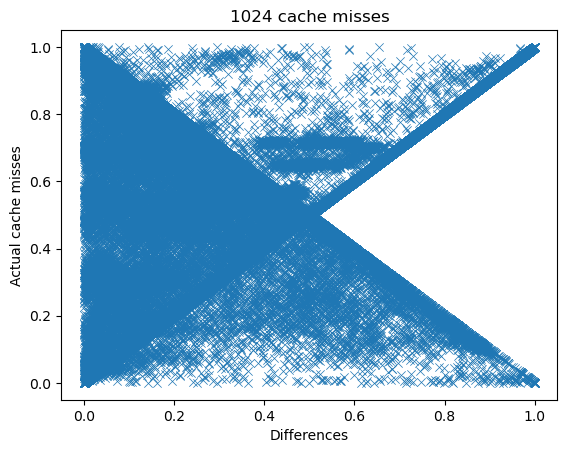

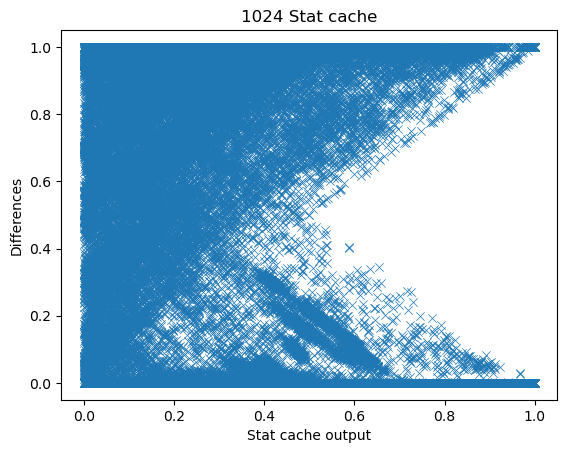

In [9]:
plt.title('1024 cache misses')
plt.xlabel('Differences')
plt.ylabel('Actual cache misses')
plt.scatter(bdf['diffs_2048'], bdf['cm_2048'], marker='x', linewidths = 0.5)
plt.show()
plt.title('1024 Stat cache')
plt.xlabel('Stat cache output')
plt.ylabel('Differences')
plt.scatter(bdf['diffs_2048'], bdf['sc_2048'], marker='x', linewidths = 0.5)
plt.show()

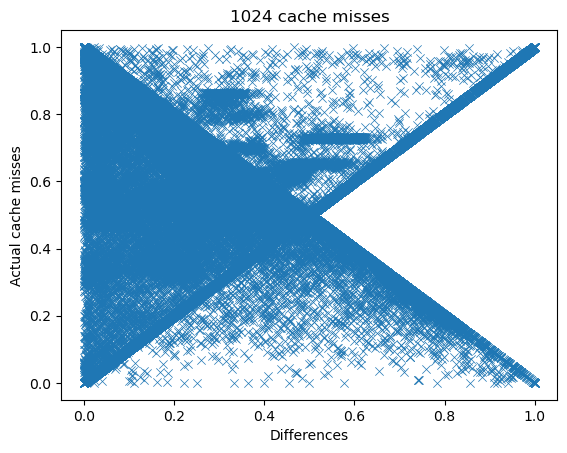

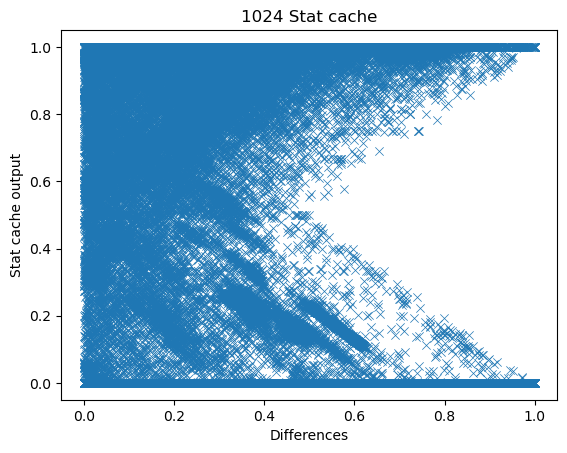

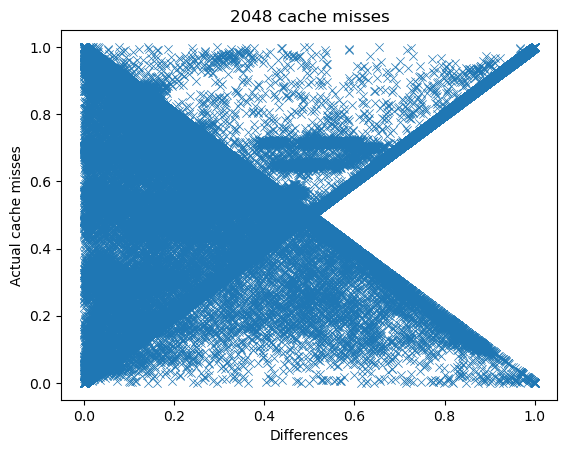

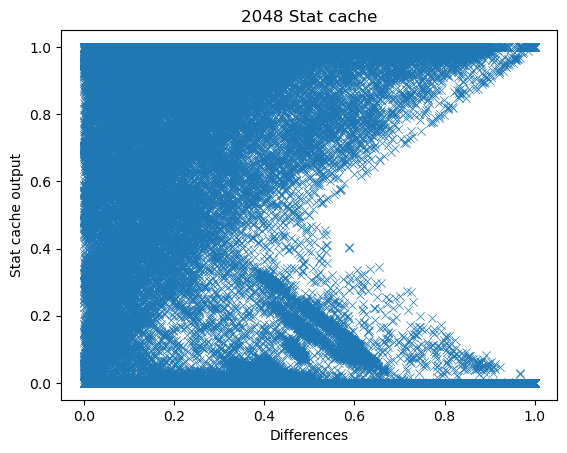

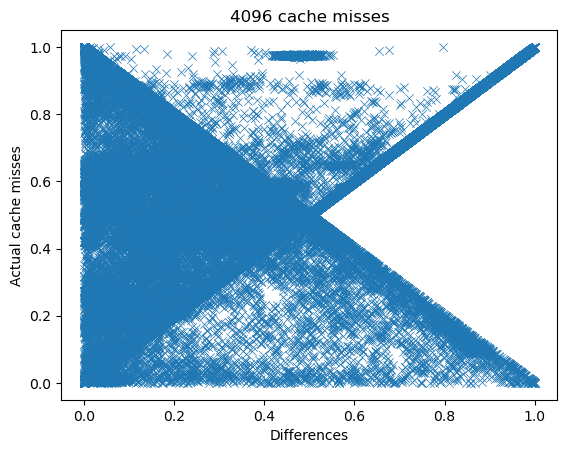

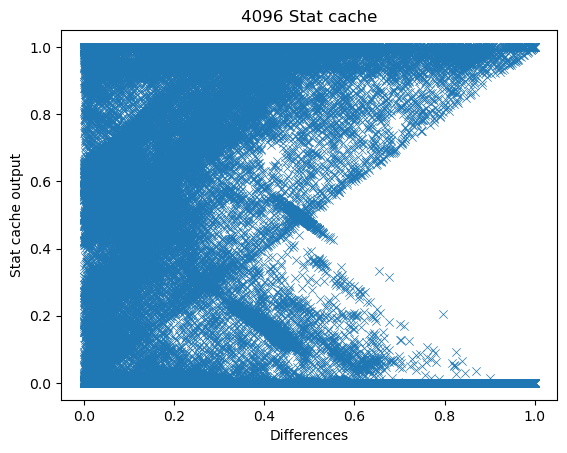

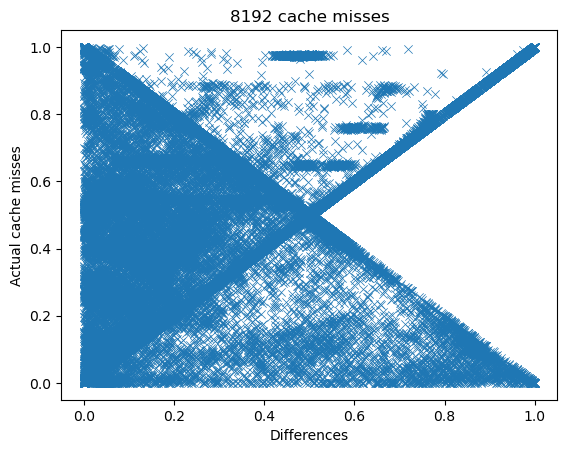

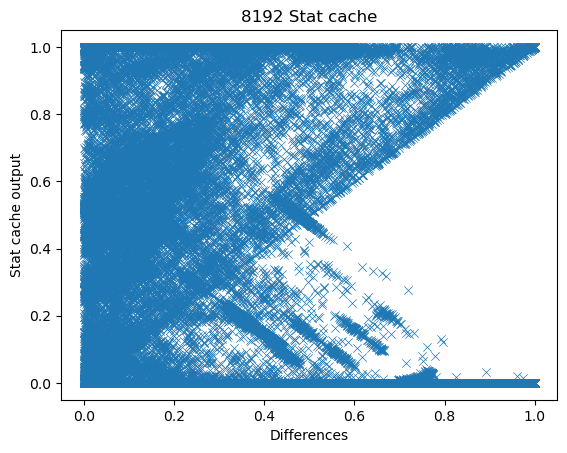

In [11]:
for i in ['1024','2048','4096','8192']:
    plt.title(i + ' cache misses')
    plt.ylabel('Actual cache misses')
    plt.xlabel('Differences')
    plt.scatter(bdf['diffs_'+i], bdf['cm_'+i], marker='x', linewidths = 0.5)
    plt.show()
    plt.title(i + ' Stat cache')
    plt.ylabel('Stat cache output')
    plt.xlabel('Differences')
    plt.scatter(bdf['diffs_'+i], bdf['sc_'+i], marker='x', linewidths = 0.5)
    plt.show()

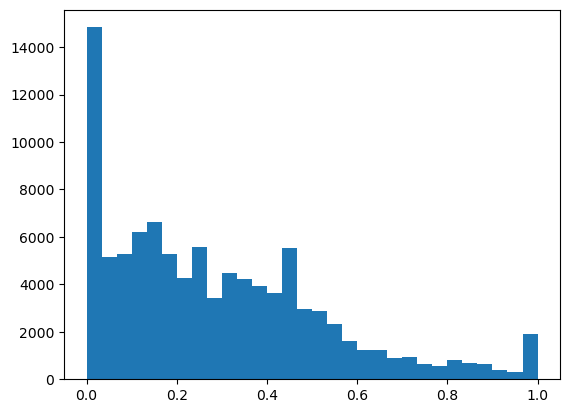

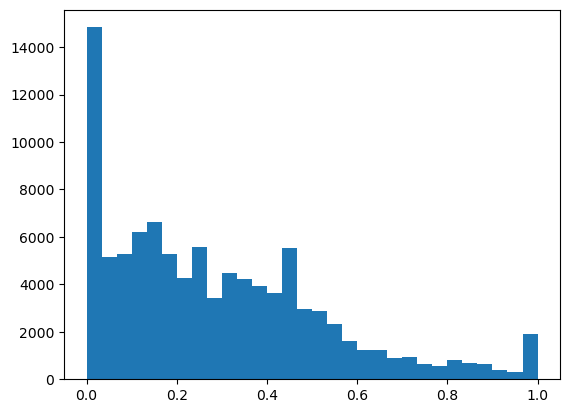

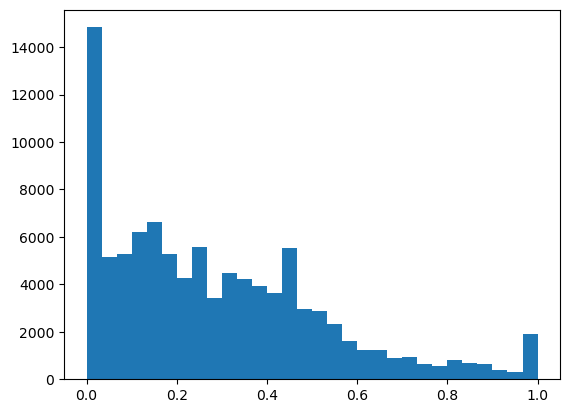

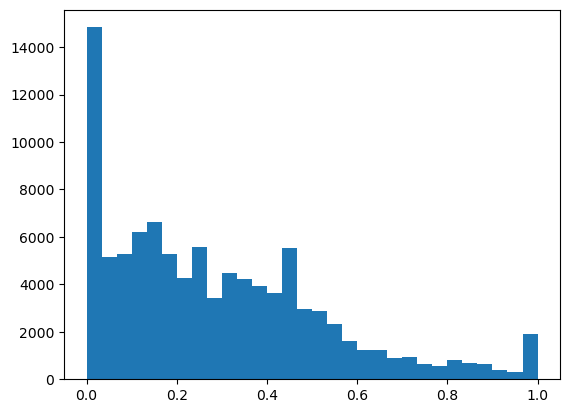

In [18]:
for i in ['1024','2048','4096','8192']:
    plt.title("Hi")
    plt.hist(bdf['diffs_'+i], bins =30)
    plt.show()